# Visualizing Customer Segments: Merging Demographics with Shopping Behavior

## Table of Contents <a id='back'></a>
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Data Wrangling](#data-wrangling)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Formatting](#formatting)
    - [Removing Irrelevant Data](#removing-irrelevant-data)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

## Project Introduction

[project intro]

### Analysis Outline

[Analysis Outline]

### Results

[Results]


[Back to Table of Contents](#back)

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing file for assignment
try:
    df = pd.read_csv('shopping_behavior_updated.csv', sep=',')
except:
    df = pd.read_csv('/datasets/shopping_behavior_updated.csv', sep=',')

[Back to Table of Contents](#back)

## Data Wrangling

In [3]:
# Getting general information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Duplicates

In [4]:
# Checking for duplicates
df.duplicated().sum()

0

[Back to Table of Contents](#back)

### Missing Values

In [5]:
# Checking for null values
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

[Back to Table of Contents](#back)

### Formatting

In [6]:
# Getting general information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
#checking for snakecase format
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [8]:
# Renaming column names to snake_case format
df = df.rename(columns={'Customer ID': 'customer_id',
                        'Age': 'age',
                        'Gender': 'gender',
                        'Item Purchased': 'item_purchased',
                        'Category': 'category',
                        'Purchase Amount (USD)': 'usd_total',
                        'Location': 'location',
                        'Size': 'size',
                        'Color': 'color',
                        'Season': 'season',
                        'Review Rating': 'customer_rating',
                        'Subscription Status': 'sub_status',
                        'Shipping Type': 'shipping_type',
                        'Discount Applied': 'discount_applied',
                        'Promo Code Used': 'promo_code_applied',
                        'Previous Purchases': 'previous_orders',
                        'Payment Method': 'payment_method',
                        'Frequency of Purchases': 'order_freq'})
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'usd_total', 'location', 'size', 'color', 'season', 'customer_rating',
       'sub_status', 'shipping_type', 'discount_applied', 'promo_code_applied',
       'previous_orders', 'payment_method', 'order_freq'],
      dtype='object')

In [9]:
# Converting all cell values into snakecase format and removing all nonlegible characters
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.lower()
        df[column] = df[column].str.strip()
        df[column] = df[column].str.rstrip()
        df[column] = df[column].str.replace(' ', '_')
        df[column] = df[column].str.replace('[^a-z0-9_]', '')
        df[column] = df[column].astype('category')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_id         3900 non-null   int64   
 1   age                 3900 non-null   int64   
 2   gender              3900 non-null   category
 3   item_purchased      3900 non-null   category
 4   category            3900 non-null   category
 5   usd_total           3900 non-null   int64   
 6   location            3900 non-null   category
 7   size                3900 non-null   category
 8   color               3900 non-null   category
 9   season              3900 non-null   category
 10  customer_rating     3900 non-null   float64 
 11  sub_status          3900 non-null   category
 12  shipping_type       3900 non-null   category
 13  discount_applied    3900 non-null   category
 14  promo_code_applied  3900 non-null   category
 15  previous_orders     3900 non-null   in

,customer_id,age,gender,item_purchased,category,usd_total,location,size,color,season,customer_rating,sub_status,shipping_type,discount_applied,promo_code_applied,previous_orders,payment_method,order_freq
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,express,yes,yes,14,venmo,fortnightly
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,express,yes,yes,2,cash,fortnightly
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free_shipping,yes,yes,23,credit_card,weekly
3,4,21,male,sandals,footwear,90,rhode_island,m,maroon,spring,3.5,yes,next_day_air,yes,yes,49,paypal,weekly
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free_shipping,yes,yes,31,paypal,annually


Observation:

- By converting string columns to snake_case and refining table data types, data usage has dropped 62.1%, from over 548.6 KB at the start to 207.8 KB. This optimization process will help reduce data costs and enhance performance as more data is added in the future.

In [10]:
# The ‘discount_applied’ and ‘promo_code_applied’ columns contain duplicate information, so one can be removed
discount = df[['discount_applied', 'promo_code_applied']]

print(discount.sample(10))
print(df['discount_applied'].value_counts())
print(df['promo_code_applied'].value_counts())

     discount_applied promo_code_applied
479               yes                yes
2519               no                 no
3067               no                 no
2741               no                 no
2405               no                 no
1636              yes                yes
3071               no                 no
2441               no                 no
3485               no                 no
3314               no                 no
discount_applied
no     2223
yes    1677
Name: count, dtype: int64
promo_code_applied
no     2223
yes    1677
Name: count, dtype: int64


Observation:

- It appears the promo_code_applied column is a redundant duplicate of the discount_applied column, and can be removed to further reduce data usage

In [11]:
# Looking at the different shipping types it can be condensed into fewer unique values to simplify the analysis
df['shipping_type'].unique()

['express', 'free_shipping', 'next_day_air', 'standard', '2-day_shipping', 'store_pickup']
Categories (6, object): ['2-day_shipping', 'express', 'free_shipping', 'next_day_air', 'standard', 'store_pickup']

In [12]:
# Replacing shipping types to paid or free shipping
df['shipping_type'] = df['shipping_type'].replace('express', 'paid_shipping').replace('next_day_air', 'paid_shipping').replace('standard', 'paid_shipping').replace('2-day_shipping', 'paid_shipping').replace('store_pickup', 'free_shipping')
df['shipping_type'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_11708\1085959409.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['shipping_type'] = df['shipping_type'].replace('express', 'paid_shipping').replace('next_day_air', 'paid_shipping').replace('standard', 'paid_shipping').replace('2-day_shipping', 'paid_shipping').replace('store_pickup', 'free_shipping')


['paid_shipping', 'free_shipping']
Categories (2, object): ['paid_shipping', 'free_shipping']

In [13]:
# Looking at the different payment methods can be condensed into fewer unique values to simplify the analysis
df['payment_method'].unique()

['venmo', 'cash', 'credit_card', 'paypal', 'bank_transfer', 'debit_card']
Categories (6, object): ['bank_transfer', 'cash', 'credit_card', 'debit_card', 'paypal', 'venmo']

In [14]:
# Replacing payment methods into the main payment categories
df['payment_method'] = df['payment_method'].replace('venmo', 'payment_service').replace('credit_card', 'credit_debit_card').replace('paypal', 'payment_service').replace('bank_transfer', 'cash').replace('debit_card', 'credit_debit_card')
df['payment_method'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_11708\3231755079.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['payment_method'] = df['payment_method'].replace('venmo', 'payment_service').replace('credit_card', 'credit_debit_card').replace('paypal', 'payment_service').replace('bank_transfer', 'cash').replace('debit_card', 'credit_debit_card')


['payment_service', 'cash', 'credit_debit_card']
Categories (3, object): ['cash', 'credit_debit_card', 'payment_service']

In [15]:
# The current order frequency categories are somewhat unclear, so I will standardize them by 
# converting the timeframes into the total number of orders made in the past year, since they 
# all represent either repeat or first-time orders.
df['order_freq'].unique()

['fortnightly', 'weekly', 'annually', 'quarterly', 'bi-weekly', 'monthly', 'every_3_months']
Categories (7, object): ['annually', 'bi-weekly', 'every_3_months', 'fortnightly', 'monthly', 'quarterly', 'weekly']

In [16]:
# Replacing current unique values into total orders made in the past year
df['order_freq'] = df['order_freq'].replace('fortnightly', 26).replace('weekly', 52).replace('annually', 1).replace('quarterly', 4).replace('bi-weekly', 26).replace('monthly', 12).replace('every_3_months', 4)
# Since all values are now numeric, I will convert the column's data type to integer
df['order_freq'] = df['order_freq'].astype('int')
# Renaming the column
df = df.rename(columns={'order_freq': 'total_orders_past_year'})
df['total_orders_past_year'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_11708\369253285.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['order_freq'] = df['order_freq'].replace('fortnightly', 26).replace('weekly', 52).replace('annually', 1).replace('quarterly', 4).replace('bi-weekly', 26).replace('monthly', 12).replace('every_3_months', 4)
C:\Users\jason\AppData\Local\Temp\ipykernel_11708\369253285.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['order_freq'] = df['order_freq'].replace('fortnightly', 26).replace('weekly', 52).replace('annually', 1).replace('qua

array([26, 52,  1,  4, 12])

[Back to Table of Contents](#back)

### Removing Irrelevant Data

In [17]:
# Removing columns we do not need for this analysis
df = df.drop(columns=['promo_code_applied'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   customer_id             3900 non-null   int64   
 1   age                     3900 non-null   int64   
 2   gender                  3900 non-null   category
 3   item_purchased          3900 non-null   category
 4   category                3900 non-null   category
 5   usd_total               3900 non-null   int64   
 6   location                3900 non-null   category
 7   size                    3900 non-null   category
 8   color                   3900 non-null   category
 9   season                  3900 non-null   category
 10  customer_rating         3900 non-null   float64 
 11  sub_status              3900 non-null   category
 12  shipping_type           3900 non-null   category
 13  discount_applied        3900 non-null   category
 14  previous_orders         

[Back to Table of Contents](#back)

## Customer Segmentation Analysis

In [18]:
# Getting general information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   customer_id             3900 non-null   int64   
 1   age                     3900 non-null   int64   
 2   gender                  3900 non-null   category
 3   item_purchased          3900 non-null   category
 4   category                3900 non-null   category
 5   usd_total               3900 non-null   int64   
 6   location                3900 non-null   category
 7   size                    3900 non-null   category
 8   color                   3900 non-null   category
 9   season                  3900 non-null   category
 10  customer_rating         3900 non-null   float64 
 11  sub_status              3900 non-null   category
 12  shipping_type           3900 non-null   category
 13  discount_applied        3900 non-null   category
 14  previous_orders         

,customer_id,age,gender,item_purchased,category,usd_total,location,size,color,season,customer_rating,sub_status,shipping_type,discount_applied,previous_orders,payment_method,total_orders_past_year
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,paid_shipping,yes,14,payment_service,26
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,paid_shipping,yes,2,cash,26
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free_shipping,yes,23,credit_debit_card,52
3,4,21,male,sandals,footwear,90,rhode_island,m,maroon,spring,3.5,yes,paid_shipping,yes,49,payment_service,52
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free_shipping,yes,31,payment_service,1


### Demographic Segmentation

#### 1. Who are the most valuable customer segments by demographics and spending?

In [19]:
# Grouping the total sales and customers for each demographic
gender_demo = df.groupby('gender').agg({'usd_total': 'sum', 'gender': 'count'})

# Naming columns
gender_demo.columns = ['total_sales', 'total_customers']

# Calculating the average sales per customer, sales market share, and demographic marketshare
gender_demo['avg_sales_per_customer'] = (gender_demo['total_sales'] / gender_demo['total_customers']).round(2)
gender_demo['percent_of_sales'] = ((gender_demo['total_sales'] / (gender_demo['total_sales'].sum())) * 100).round(1)
gender_demo['percent_of_customers'] = ((gender_demo['total_customers'] / (gender_demo['total_customers'].sum())) * 100).round(1)

gender_demo = gender_demo.reset_index()
gender_demo

C:\Users\jason\AppData\Local\Temp\ipykernel_11708\3636089088.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_demo = df.groupby('gender').agg({'usd_total': 'sum', 'gender': 'count'})


,gender,total_sales,total_customers,avg_sales_per_customer,percent_of_sales,percent_of_customers
0,female,75191,1248,60.25,32.3,32.0
1,male,157890,2652,59.54,67.7,68.0


Observation:

- On average, female customers spend slightly more per transaction ($60.25) than male customers ($59.54)

- However, males represent a substantially larger portion of the customer base, comprising 68% of the market compared to 32% for females. This distribution is reflected in the total sales percentages: 67.7% for men versus 32.3% for women.

- Overall, males constitute the primary customer demographic in terms of both total sales and market share

In [20]:
# Grouping total sales, customers, and average rating by location
loc_demo = df.groupby('location').agg({'usd_total': 'sum', 'customer_id': 'count', 'customer_rating': 'mean'})

# Naming columns
loc_demo.columns = ['total_sales', 'total_customers', 'avg_rating']

# Calculating average sales per customer 
loc_demo['avg_sales_per_customer'] = (loc_demo['total_sales'] / loc_demo['total_customers']).round(2)

# Rounding the average ratings column
loc_demo['avg_rating'] = loc_demo['avg_rating'].round(2)

# Sorting values to get the top 5 locations based on sales generated
loc_demo = loc_demo.sort_values(by='total_sales', ascending=False).reset_index().head()

# Changing this column back to a string data type so seaborn can properly interact with the data and visualize it properly
loc_demo['location'] = loc_demo['location'].astype('object')
loc_demo

C:\Users\jason\AppData\Local\Temp\ipykernel_11708\265883651.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loc_demo = df.groupby('location').agg({'usd_total': 'sum', 'customer_id': 'count', 'customer_rating': 'mean'})


,location,total_sales,total_customers,avg_rating,avg_sales_per_customer
0,montana,5784,96,3.81,60.25
1,illinois,5617,92,3.64,61.05
2,california,5605,95,3.83,59.00
3,idaho,5587,93,3.78,60.08
4,nevada,5514,87,3.71,63.38


Observation:

- Montana, Illinois, California, Idaho, and Nevada represent the locations with the highest sales and largest customer bases.

- Customer ratings in these top five locations range from 3.64 to 3.83.

- Average sales per customer are relatively consistent across these locations, ranging from $59.00 to $63.38.

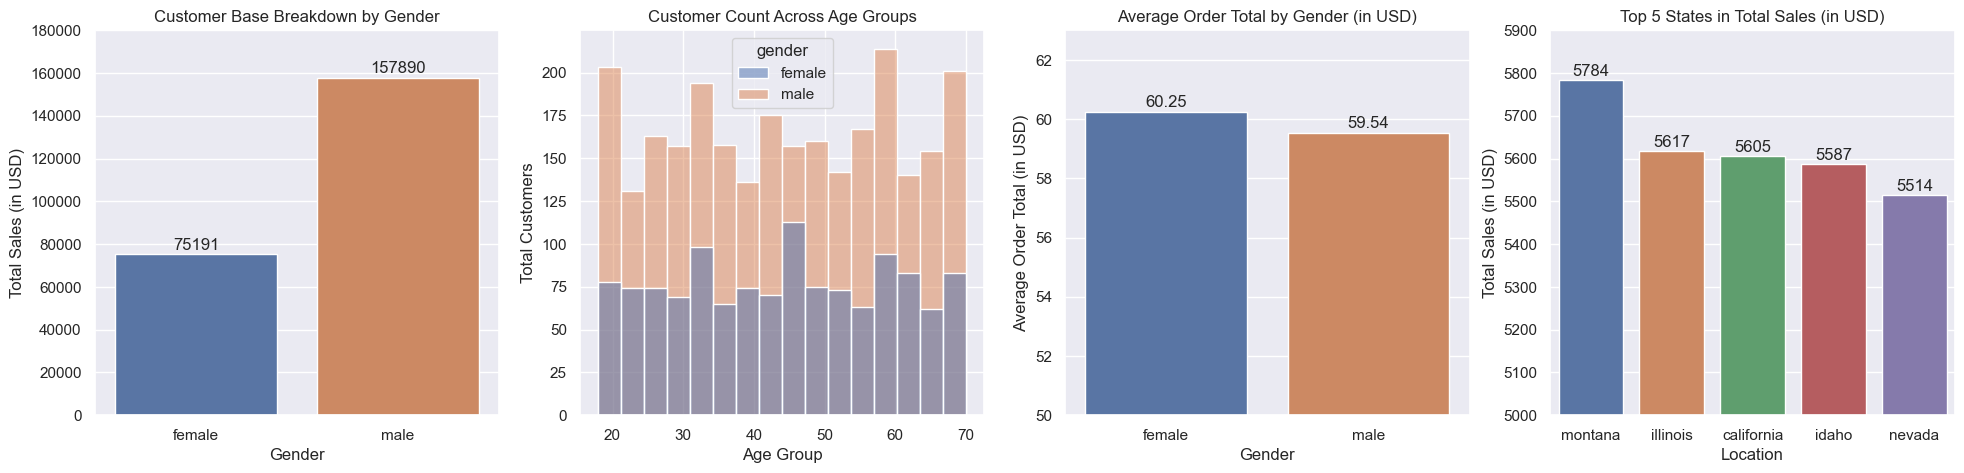

In [21]:
# Setting theme and figure size
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Bar graph for total sales by gender demographic
total_dem = sns.barplot(data=gender_demo,
                        x='gender',
                        y='total_sales',
                        hue='gender',
                        ax=axes[0])
# Creating loop to display numeric value on graph
for r in total_dem.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    label = '{:.0f}'.format(y_value)
    total_dem.annotate(label,
                       (x_value, y_value),
                       xytext=(0, 1),
                       textcoords='offset points',
                       ha='center',
                       va='bottom')
axes[0].set_title('Customer Base Breakdown by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Total Sales (in USD)')
axes[0].set_ylim(0, 180000)
    
# Creating histogram for gender and age groups
sns.histplot(data=df,
             x='age',
             hue='gender',
             ax=axes[1])
axes[1].set_title('Customer Count Across Age Groups')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Total Customers')

# Creating bar plot to compare average total (in USD) by each order and gender
avg_sales = sns.barplot(data=gender_demo,
                        x='gender',
                        y='avg_sales_per_customer',
                        hue='gender',
                        ax=axes[2])
# Creating loop to display numeric value on graph
for r in avg_sales.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    label = '{:.2f}'.format(y_value)
    avg_sales.annotate(label,
                       (x_value, y_value),
                       xytext=(0, 1),
                       textcoords='offset points',
                       ha='center',
                       va='bottom')
axes[2].set_title('Average Order Total by Gender (in USD)')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Average Order Total (in USD)')
axes[2].set_ylim(50, 63)

# Creating bar plot to comparing total sales in the top 5 locations
top_states = sns.barplot(data=loc_demo,
                         x='location',
                         y='total_sales',
                         hue='location',
                         ax=axes[3])
# Creating loop to display numeric value on graph
for r in top_states.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    label = '{:.0f}'.format(y_value)
    top_states.annotate(label,
                        (x_value, y_value),
                        xytext=(0, 1),
                        textcoords='offset points',
                        ha='center',
                        va='bottom')
axes[3].set_title('Top 5 States in Total Sales (in USD)')
axes[3].set_xlabel('Location')
axes[3].set_ylabel('Total Sales (in USD)')
axes[3].set_ylim(5000, 5900)

plt.show()

Observation:

- Demographic Overview: Men represent the primary customer demographic, contributing roughly a 2:1 ratio in total sales compared to women.

- Age Distribution: According to the histogram, the largest male customer groups are in their early 20s, late 50s, and 70+ age ranges, while the largest female groups are in their early 30s, mid-40s, and late 50s. It is also interesting to see an increase in male customers once every 8-10 years.

- Spending Patterns: On average, women spend slightly more per order at $60.25, compared to $59.54 for men. However, men make up a significantly larger share of total customers.

- Regional Insights: The top five states by total sales are California, Montana, Idaho, Nevada, and Illinois.

Key Insight:

- The company’s primary target demographic is men, so most marketing campaigns should focus on reaching this group. The histogram reveals that male customers tend to show a spike in sales every 8–10 years, suggesting a potential purchasing cycle of about a decade. In contrast, female customers demonstrate more consistent purchasing habits over time. Additionally, most of the top-performing sales locations are concentrated in the western United States. It would be worthwhile to analyze the marketing data from these regions to determine whether their strategies can be replicated or tailored to other areas based on regional preferences.

#### 2. What product preferences differ across customer segments?

In [22]:
# Counting the number of items purchased per sub-category by each demographic
m_products = df[df['gender'] == 'male'].groupby('item_purchased').agg({'item_purchased': 'count'})
f_products = df[df['gender'] == 'female'].groupby('item_purchased').agg({'item_purchased': 'count'})

# Naming the columns
m_products.columns = ['quantity_sold']
f_products.columns = ['quantity_sold']

# Turning data into a table and sorting the values to get the top 10 sold products
top_mproducts = m_products.reset_index().sort_values(by='quantity_sold', ascending=False).head(10)
top_fproducts = f_products.reset_index().sort_values(by='quantity_sold', ascending=False).head(10)

# Changing this column back to a string data type so seaborn can properly interact with the data and visualize it properly
top_mproducts['item_purchased'] = top_mproducts['item_purchased'].astype('object')
top_fproducts['item_purchased'] = top_fproducts['item_purchased'].astype('object')

C:\Users\jason\AppData\Local\Temp\ipykernel_11708\10343011.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  m_products = df[df['gender'] == 'male'].groupby('item_purchased').agg({'item_purchased': 'count'})
C:\Users\jason\AppData\Local\Temp\ipykernel_11708\10343011.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f_products = df[df['gender'] == 'female'].groupby('item_purchased').agg({'item_purchased': 'count'})


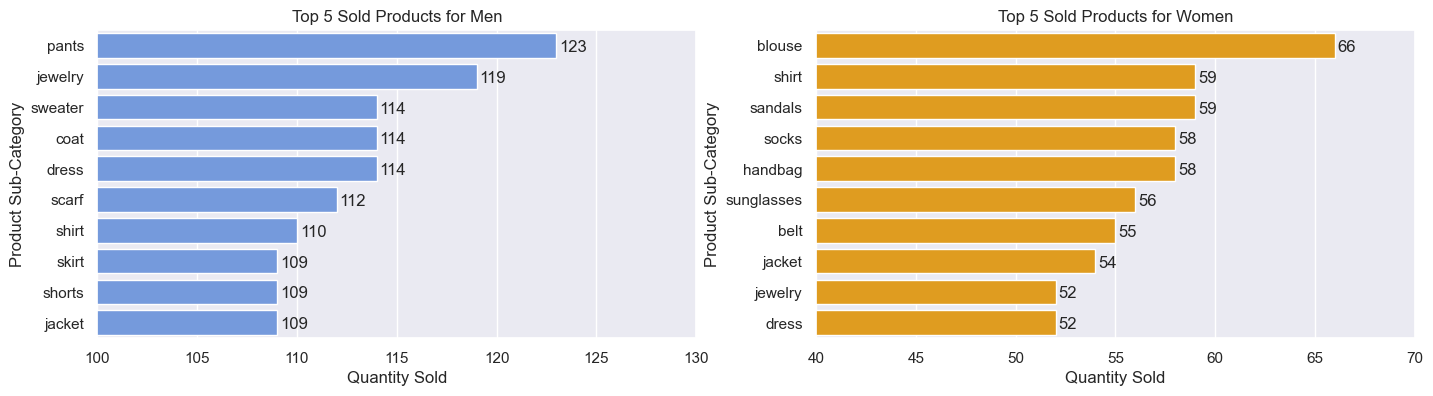

In [23]:
# Setting figure size
fig, axes = plt.subplots(1, 2, figsize=(17, 4))

# Creating bar plot count total items sold
top_mproducts_plot = sns.barplot(data=top_mproducts,
                                 x='quantity_sold',
                                 y='item_purchased',
                                 color='cornflowerblue',
                                 ax=axes[0])
# Creating loop to display numeric value on graph
for r in top_mproducts_plot.patches:
    y_value = r.get_y() + (r.get_height() + 0.2) / 2
    x_value = r.get_width()
    label = '{:.0f}'.format(x_value)
    top_mproducts_plot.annotate(label,
                                (x_value, y_value),
                                xytext=(2, 1),
                                textcoords='offset points',
                                ha='left',
                                va='center') 
axes[0].set_title('Top 5 Sold Products for Men')
axes[0].set_xlabel('Quantity Sold')
axes[0].set_xlim(100, 130)
axes[0].set_ylabel('Product Sub-Category')

# # Creating bar plot count total items sold
top_fproducts_plot = sns.barplot(data=top_fproducts,
                                 x='quantity_sold',
                                 y='item_purchased',
                                 color='orange',
                                 ax=axes[1])
# Creating loop to display numeric value on graph
for r in top_fproducts_plot.patches:
    y_value = r.get_y() + (r.get_height() + 0.2) / 2
    x_value = r.get_width()
    label = '{:.0f}'.format(x_value)
    top_fproducts_plot.annotate(label,
                                (x_value, y_value),
                                xytext=(2, 1),
                                textcoords='offset points',
                                ha='left',
                                va='center') 
axes[1].set_title('Top 5 Sold Products for Women')
axes[1].set_xlabel('Quantity Sold')
axes[1].set_xlim(40, 70)
axes[1].set_ylabel('Product Sub-Category')

plt.show()

Observation:

- Men’s Products: The most popular products among male customers are pants, jewelry, sweaters, coats, and dresses. The inclusion of jewelry and dresses may indicate that these items are either gift purchases for friends, family, or significant others, or culturally influenced garments resembling traditional pieces such as Roman togas, Egyptian kilts, or Middle Eastern thobes.

- Women’s Products: The top-selling items for women include blouses, shirts, sandals, socks, and handbags, reflecting a focus on everyday apparel and versatile accessories suitable for both casual and semi-formal wear in warmer seasons or climates.

Key Insight:

- Male Product Insights: The most popular products for men, being pants, sweaters, and coats suggest a purchasing pattern aligned with colder climates. This aligns with the top five sales locations, which are primarily states with cooler weather (California may be considered colder if the customer is based in Northern California, where temperatures can drop significantly).

    The presence of jewelry and dresses can be interpreted in two ways:

        - If the company sells culturally influenced items such as togas, kilts, or thobes, it indicates a demand for cultural apparel among U.S. customers.

        - If not, these items may represent gift purchases for friends, family, or significant others. Additional survey data would be valuable for the marketing team to better target advertisements.

    If gift-giving is a significant factor, the marketing team could focus on fall/winter promotions for men, potentially offering bundle sales for gifts during the shopping seasons.

- Female Product Insights: The most popular products for women are blouses, shirts, sandals, socks, and handbags. Blouses, shirts, and sandals indicate a preference for warmer climates or casual outings, suggesting seasonality in purchasing behavior. Future marketing strategies could include bundling these items for warmer seasons or regions to increase sales. Handbags, as higher-margin and popular items, could be emphasized during fall/winter, aligning with peak shopping periods.

#### 3. Which locations have the highest customer ratings? 

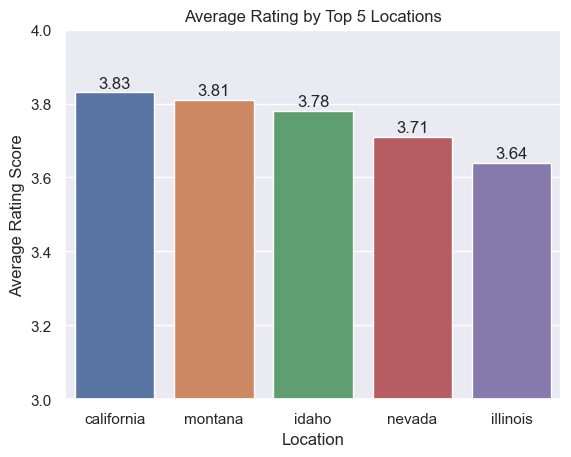

In [24]:
# Sorting the values from the location dataframe by average rating
loc_demo = loc_demo.sort_values(by='avg_rating', ascending=False).head()

# Plotting the average rating given from each of the top 5 states in sales
top_loc_rating = sns.barplot(data=loc_demo,
                             x='location',
                             y='avg_rating',
                             hue='location')
# Creating loop to display numeric value on graph
for r in top_loc_rating.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    label = '{:.2f}'.format(y_value)
    top_loc_rating.annotate(label,
                            (x_value, y_value),
                            xytext=(0, 1),
                            textcoords='offset points',
                            ha='center',
                            va='bottom')
plt.title('Average Rating by Top 5 Locations')
plt.xlabel('Location')
plt.ylabel('Average Rating Score')
plt.ylim([3, 4])

plt.show()

Observation:

- Based on the top five sales locations, customer ratings generally range from 3.5 to 4.0 stars out of 5. This indicates that customers have a slightly above average to good experience with their purchases, resulting in an overall net positive perception. While this is a solid starting point, there is significant room for improvement. Conducting customer surveys could provide valuable insights into shopper preferences and expectations, helping to enhance both the shopping experience and the product offerings.

#### 4. Which gender and location shows the highest purchase frequency?

In [25]:
# Counting total customers and totaling past orders from each gender demographic
mf_customers = df.groupby('gender').agg({'customer_id': 'count', 'total_orders_past_year': 'sum'})
mf_customers.columns = ['total_customers', 'est_total_reorders']

# Converting to dataframe and sorting for most reorders
order_freq_gender = mf_customers.reset_index().sort_values(by='est_total_reorders', ascending=False)

# Calculating average number of reorders per customer
order_freq_gender['avg_reorders'] = (order_freq_gender['est_total_reorders'] / order_freq_gender['total_customers']).round(2)
order_freq_gender

C:\Users\jason\AppData\Local\Temp\ipykernel_11708\983334468.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mf_customers = df.groupby('gender').agg({'customer_id': 'count', 'total_orders_past_year': 'sum'})


,gender,total_customers,est_total_reorders,avg_reorders
1,male,2652,46243,17.44
0,female,1248,21895,17.54


Observation:

- For every female customer, there are approximately two male customers, reinforcing the larger male customer base

- On average, female customers place slightly more reorders than male customers, with 17.54 reorders per customer compared to 17.44 for males, suggesting comparable loyalty across both gender demographics

In [26]:
# Grouping total customers per location and total past orders
customers_per_yr = df.groupby('location').agg({'customer_id': 'count', 'total_orders_past_year': 'sum'})
customers_per_yr.columns = ['total_customers', 'est_total_reorders']

# Converting to dataframe and sorting values by past orders
order_freq_loc = customers_per_yr.reset_index().sort_values(by='est_total_reorders', ascending=False).head()

# Calculating average number of reorders per location
order_freq_loc['avg_reorders'] = (order_freq_loc['est_total_reorders'] / order_freq_loc['total_customers']).round(2)

# Changing this column back to a string data type so seaborn can properly interact with the data and visualize it properly
order_freq_loc['location'] = order_freq_loc['location'].astype('object')
order_freq_loc

C:\Users\jason\AppData\Local\Temp\ipykernel_11708\2775612606.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customers_per_yr = df.groupby('location').agg({'customer_id': 'count', 'total_orders_past_year': 'sum'})


,location,total_customers,est_total_reorders,avg_reorders
12,illinois,92,1826,19.85
17,louisiana,84,1764,21.00
31,new_york,87,1677,19.28
9,georgia,79,1629,20.62
0,alabama,89,1621,18.21


Observation:

- Among the top five states with the highest number of reorders, only Illinois is also in the top five for total sales. This indicates that the other four states generate lower overall sales despite high reorder activity.

- Customers in these top five reorder states place significantly more orders, ranging from 18 to 21 reorders per customer, compared with the overall average of 17.45

- The high volume of reorders in these regions presents an opportunity for targeted marketing strategies, such as bundle promotions or coupon incentives to encourage repeat purchases and increase customer lifetime value.

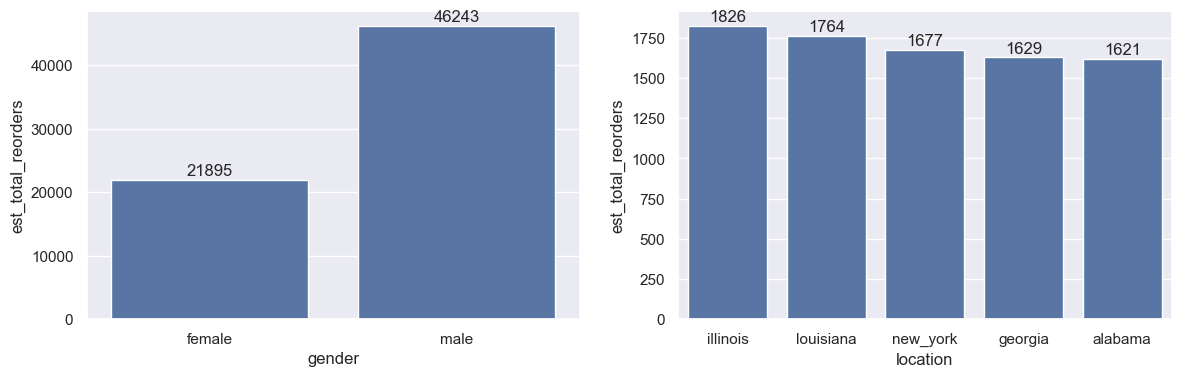

In [27]:
# Setting figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

#
gen_reorders = sns.barplot(data=order_freq_gender,
                           x='gender',
                           y='est_total_reorders',
                           ax=axes[0])
for r in gen_reorders.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    label = '{:.0f}'.format(y_value)
    gen_reorders.annotate(label,
                            (x_value, y_value),
                            xytext=(0, 1),
                            textcoords='offset points',
                            ha='center',
                            va='bottom')
    
#
loc_reorders = sns.barplot(data=order_freq_loc,
                           x='location',
                           y='est_total_reorders',
                           ax=axes[1])
for r in loc_reorders.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    label = '{:.0f}'.format(y_value)
    loc_reorders.annotate(label,
                            (x_value, y_value),
                            xytext=(0, 1),
                            textcoords='offset points',
                            ha='center',
                            va='bottom')

plt.show()

Observation:

- 

### Behavioral Segmentation

#### 5. How does subscription status and shipping type affect customer behavior?

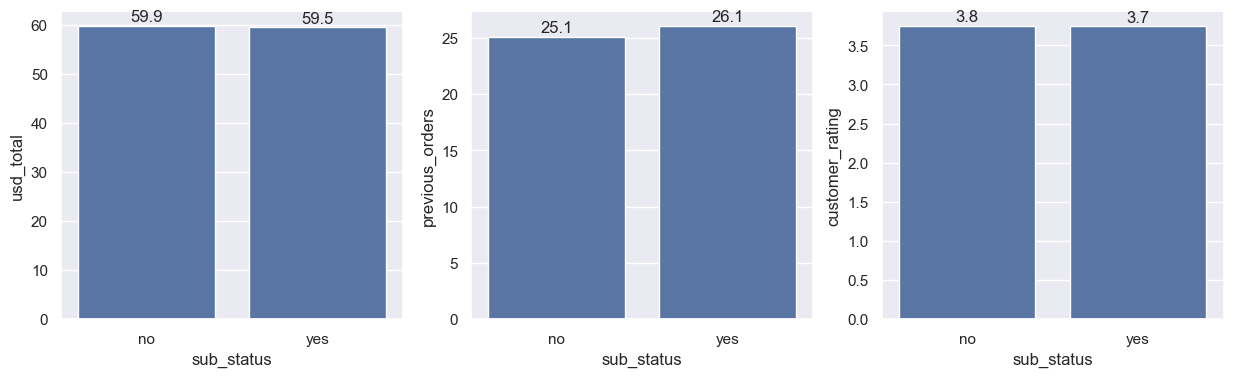

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sub_rev = sns.barplot(data=df,
                      x='sub_status',
                      y='usd_total',
                      estimator=np.mean,
                      errorbar=None,
                      ax=axes[0])
for r in sub_rev.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    space = 1
    label = '{:.1f}'.format(y_value)
    sub_rev.annotate(label,
                     (x_value, y_value),
                     xytext=(0, space),
                     textcoords='offset points',
                     ha='center',
                     va='bottom')

sub_orders = sns.barplot(data=df,
                      x='sub_status',
                      y='previous_orders',
                      estimator=np.mean,
                      errorbar=None,
                      ax=axes[1])
# Creating loop to display numeric value on graph
for r in sub_orders.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    space = 1
    label = '{:.1f}'.format(y_value)
    sub_orders.annotate(label,
                        (x_value, y_value),
                        xytext=(0, space),
                        textcoords='offset points',
                        ha='center',
                        va='bottom')


sub_rating = sns.barplot(data=df,
                      x='sub_status',
                      y='customer_rating',
                      estimator=np.mean,
                      errorbar=None,
                      ax=axes[2])
# Creating loop to display numeric value on graph
for r in sub_rating.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    space = 1
    label = '{:.1f}'.format(y_value)
    sub_rating.annotate(label,
                        (x_value, y_value),
                        xytext=(0, space),
                        textcoords='offset points',
                        ha='center',
                        va='bottom')


Observation:

- 

#### 6. Which segments respond best to discounts?

In [29]:
discounts = df.groupby(['gender', 'discount_applied']).agg({'item_purchased': 'count',
                                                            'usd_total': 'mean'})
discounts = discounts.sort_values(by='usd_total', ascending=False).reset_index()
discounts

C:\Users\jason\AppData\Local\Temp\ipykernel_11708\147839718.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discounts = df.groupby(['gender', 'discount_applied']).agg({'item_purchased': 'count',


,gender,discount_applied,item_purchased,usd_total
0,female,no,1248,60.249199
1,male,no,975,59.978462
2,male,yes,1677,59.279070
3,female,yes,0,NaN


Observation:

- 

#### 7. Which age ranges use the most discounts?

In [30]:
disc_by_age = df[df['discount_applied'] == 'yes'].groupby('age').agg({'discount_applied': 'count'})
disc_by_age.columns = ['total_discounts']
disc_by_age = disc_by_age.reset_index()

In [31]:
# Creating the bins and labels to count which age groups use the most discounts
bins = [18, 24, 34, 44, 54, 64, 70]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70']

# Using the cut function to create the age_group column for bins
disc_by_age['age_group'] = pd.cut(disc_by_age['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Checking the age group bins to see if it worked
print(disc_by_age['age_group'].value_counts().sort_index())

age_group
18-24     7
25-34    10
35-44    10
45-54    10
55-64    10
65-70     6
Name: count, dtype: int64


(25.0, 35.0)

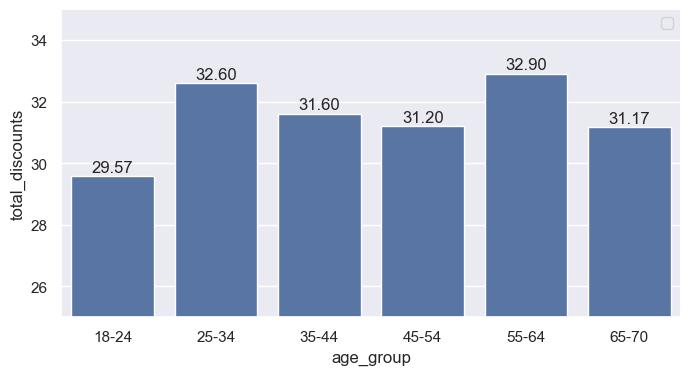

In [32]:
fig, ax = plt.subplots(figsize=(8, 4))

avg_disc_by_age = sns.barplot(data=disc_by_age,
            x='age_group',
            y='total_discounts',
            label=labels,
            errorbar=None)

for r in avg_disc_by_age.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    label = '{:.2f}'.format(y_value)
    avg_disc_by_age.annotate(label,
                            (x_value, y_value),
                            xytext=(0, 1),
                            textcoords='offset points',
                            ha='center',
                            va='bottom')
plt.legend('')
plt.ylim([25, 35])

<Axes: xlabel='discount_applied', ylabel='previous_orders'>

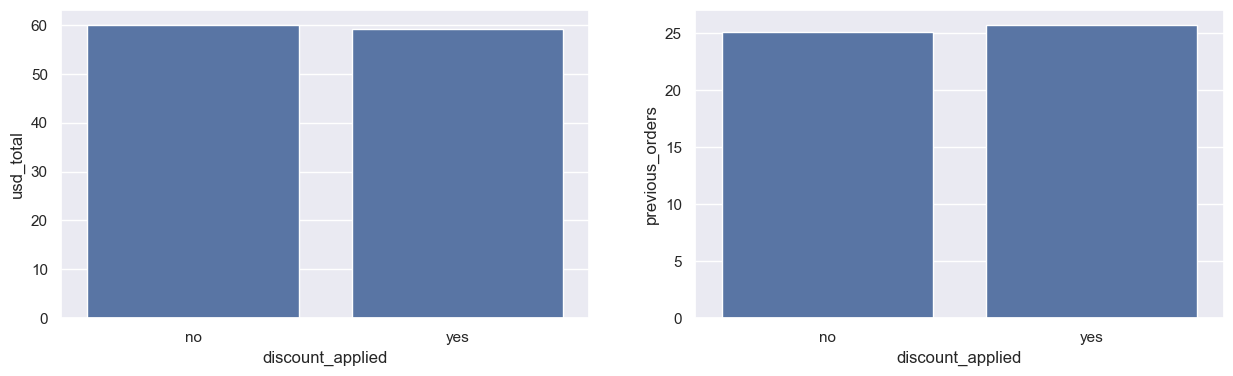

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.barplot(data=df,
            x='discount_applied',
            y='usd_total',
            estimator=np.mean,
            errorbar=None,
            ax=axes[0])

sns.barplot(data=df,
            x='discount_applied',
            y='previous_orders',
            estimator=np.mean,
            errorbar=None,
            ax=axes[1])

Observation:

- 

#### 8. What payment and location patterns exist among customer segments?

In [34]:
df.head()

,customer_id,age,gender,item_purchased,category,usd_total,location,size,color,season,customer_rating,sub_status,shipping_type,discount_applied,previous_orders,payment_method,total_orders_past_year
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,paid_shipping,yes,14,payment_service,26
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,paid_shipping,yes,2,cash,26
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free_shipping,yes,23,credit_debit_card,52
3,4,21,male,sandals,footwear,90,rhode_island,m,maroon,spring,3.5,yes,paid_shipping,yes,49,payment_service,52
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free_shipping,yes,31,payment_service,1


In [35]:
payment = df.groupby('gender').agg({'payment_method': 'value_counts'})
payment.columns = ['total_customers']
payment = payment.reset_index().sort_values(by='total_customers')
payment

C:\Users\jason\AppData\Local\Temp\ipykernel_11708\1789473830.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment = df.groupby('gender').agg({'payment_method': 'value_counts'})


,gender,payment_method,total_customers
2,female,credit_debit_card,404
1,female,cash,415
0,female,payment_service,429
5,male,cash,867
4,male,payment_service,882
3,male,credit_debit_card,903


In [36]:
m_count = df[df['gender'] == 'male'].agg({'location': 'value_counts'})
m_count.columns = ['total_customers']
m_count = m_count.reset_index()

f_count = df[df['gender'] == 'female'].agg({'location': 'value_counts'})
f_count.columns = ['total_customers']
f_count = f_count.reset_index()

In [37]:
m_count

,location,total_customers
0,california,66
1,missouri,63
2,alabama,62
3,vermont,62
4,new_york,62
5,illinois,62
6,indiana,62
7,delaware,61
8,new_mexico,61
9,minnesota,60


Observation:

- 

[Back to Table of Contents](#back)

## Conclusions and Reccomendations

[Back to Table of Contents](#back)

## Dataset Citation

Zee solver. (2023, October). Consumer Behavior and Shopping Habits Dataset, Version 1. Retrieved September 23, 2025 from [Kaggle](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data).

[Back to Table of Contents](#back)